In [1]:
%matplotlib inline
%load_ext sudo apt-key adv --recv-keys --keyserver hkp://pool.sks-keyservers.net:80 0xA5D32F012649A5A9autoreload
%autoreload 2
import matplotlib.pyplot as plt
from IPython import display

import numpy as np
import pandas as pd

from numpy.linalg import norm, svd

import itertools
import pickle
import math
import re, csv

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import logging

from util.word2vec_as_MF import Word2vecMF
from util.functions import *
from util.visualize import *

import time
dimension = 100
model =  Word2vecMF()


Please run:
  python setup.py build_ext --inplace


In [14]:
from util.visualize import *

#Path = 'benchmark/simlex999.csv'
Path = 'benchmark/men3000.csv'
#Path = 'datasets/rw2034.csv'
#Path = 'benchmark/wordsim353.csv'
Path = 'benchmark/wordsim_sim.csv'
#Path = 'datasets/MTURK-771.csv'

#datapath='enwik-200/BFGDiter_fromenwik8_dim100_step1e-07_0.0'
#datapath='enwik-200/BFGDiter_fromenwik8_dim100_step1.49198074496e-08_0.0'
#datapath='enwik-200/BFGDiter_fromenwik8_dense_dim100_step1e-07_0.0'
#datapath='enwik-200/PSiter_fromenwik8_dim100_step1e-05_0.0'
#datapath='enwik-200/PSiter_from9PMM_dim100_step5e-05_0.0'
#datapath='enwik-200/BFGDiter_from8PMM_dim100_step2.59178322952e-08_0.0'
#datapath='enwik-200/BFGDiter_from9PMM_dim100_step2.441114203507839e-09_0.0'
#datapath='enwik-200/BFGDiter_from9X0_dim100_step2.441114203507839e-09_0.0'
#datapath='initializations/8SPPMI5/'
datapath='enwik-200/revBFGDiter_fromenwik9-sub0.001000SPPMI5_dim100_step2e-07_0.0'

print(Path)

model.load_vocab(datapath+'/vocab.txt')

score1, _, _, chosen_pairs = correlation(model=model, 
                                         benchmark = Path, 
                                         from_folder=datapath,
                                         index=0)

print(model.W[4], np.count_nonzero(np.isnan(model.W)))
print(score1, len(chosen_pairs))

benchmark/wordsim_sim.csv
[-0.04227764  0.02591615  0.00556442 ...  0.00306755  0.00447677
 -0.00667263] 0
0.7151131768989535 200


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 1.62 s, sys: 31.8 ms, total: 1.66 s
Wall time: 1.65 s


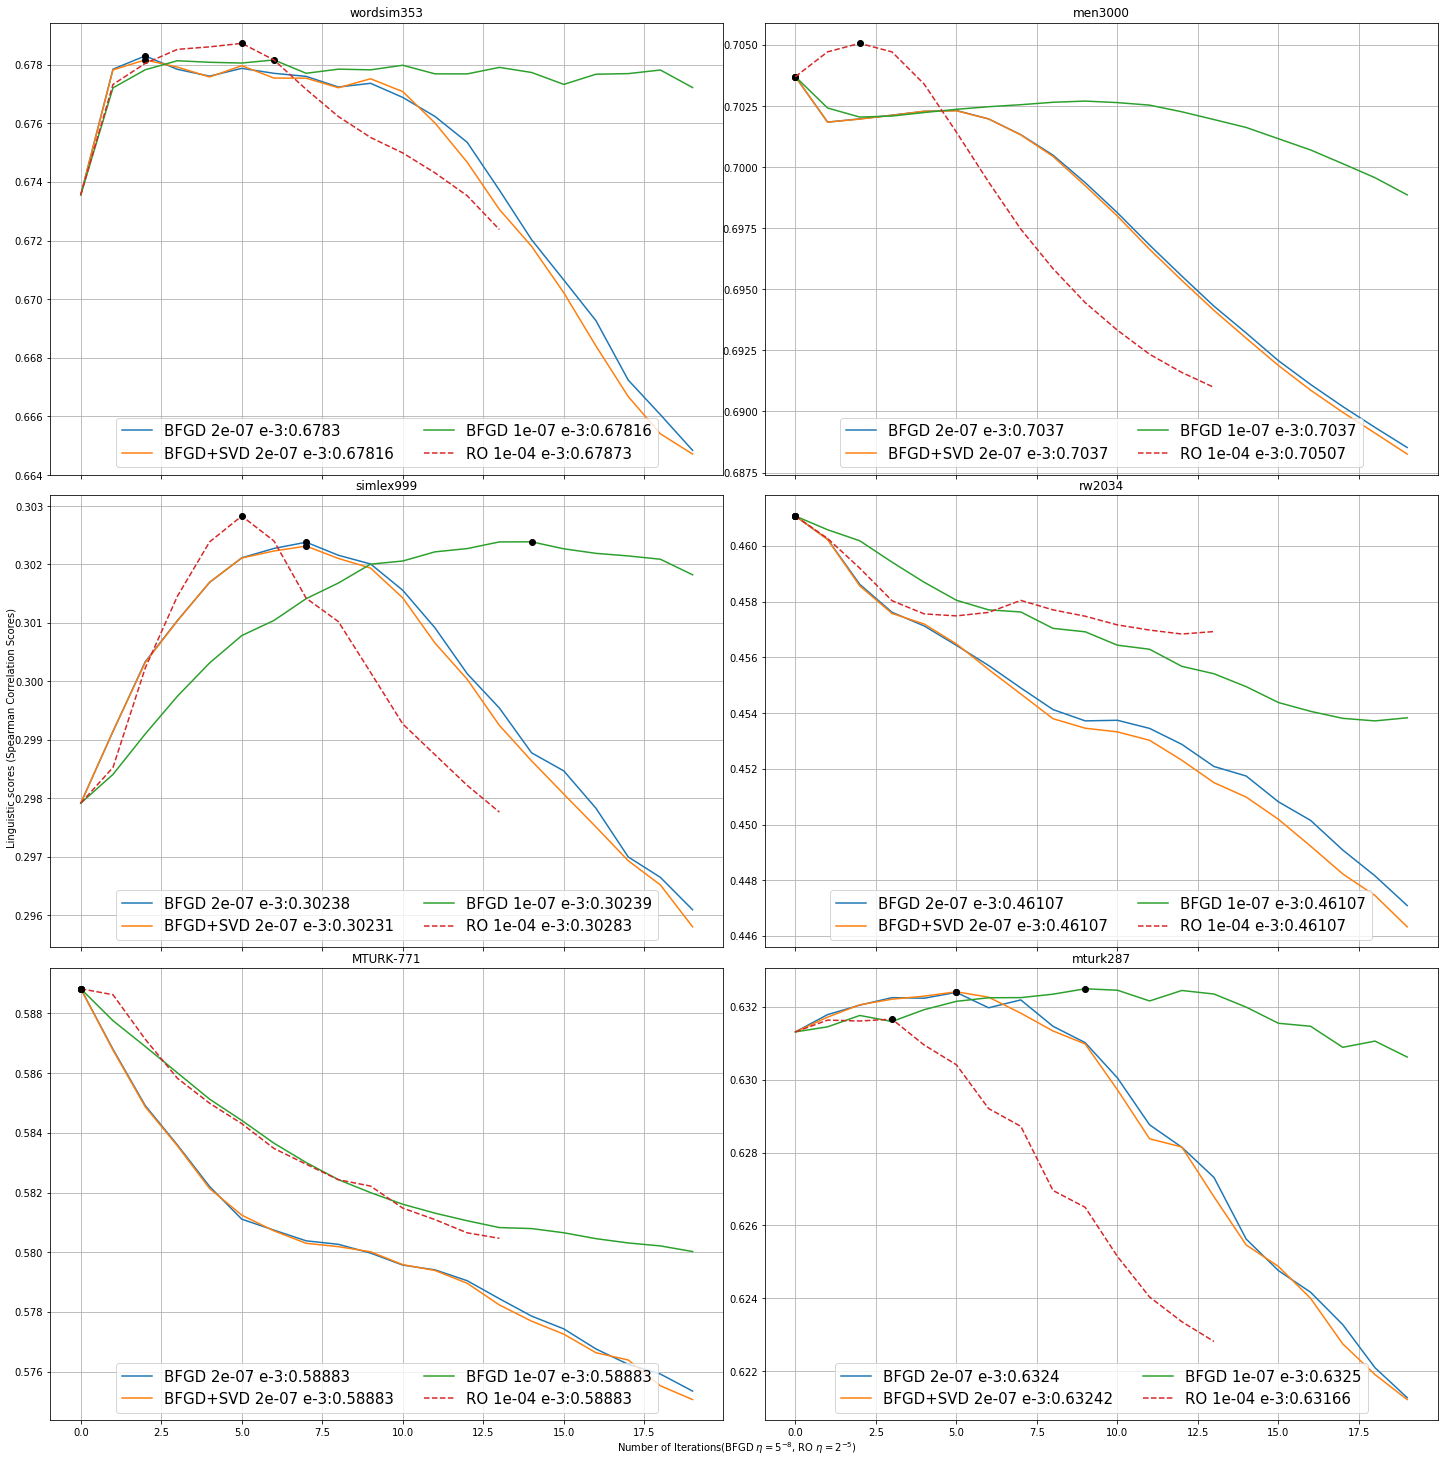

In [19]:
%%time
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from IPython import display

import numpy as np
import pandas as pd

from numpy.linalg import norm, svd

import itertools
import pickle
import math
import re, csv

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import logging
from util.word2vec_as_MF import Word2vecMF
from util.functions import *
from util.visualize import *

import time
dimension = 100
model =  Word2vecMF()

#datapath='enwik-200/BFGDiter_fromenwik8_dense_dim100_step1e-07_0.0'
#datapath='enwik-200/PSiter_fromenwik8_dim100_step1e-05_0.0'
#datapath='enwik-200/PSiter_fromenwik8PMM_dim100_step1e-05_0.0'
#datapath='enwik-200/PSiter_from9X0_dim100_step5e-05_0.0'
#datapath='enwik-200/BFGDiter_from8PMM_dim100_step2.59178322952e-08_0.0'
#datapath='enwik-200/BFGDiter_from8X0_dim100_step2.59178322952e-08_0.0'
#datapath= 'enwik-200/PSiter_from9PPM_dim100_step1e-05_0.0'
#datapath= 'enwik-200/PS10iter_fromSVD_dim100_step5e-05_factors/'
#datapath='enwik-200/BFGDiter_from9X0_dim100_step2.441114203507839e-09_0.0'
#datapath='initializations/SPPMI5/'
#datapath='enwik-200/BFGDiter_from9PPM_dim100_step2e-05_0.0'
#datapath='enwik-200/biasedRevBFGDiter_from8SPPMI5_dim100_step1e-07_0.0'
#datapath='enwik-200/PSiter_from9PPM_dim100_step2e-05_0.0'

label_list={
    #'BFGDiter_from9PPM_dim100_step5.9e-08_0.0': 'BFGD 5.9-8',
    #'BFGDiter_from9PPM_dim100_step5e-08_2.0': 'reg 2.0',
    #'BFGDiter_from9PPM_dim100_step5e-08_0.0':'reg 0.0',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step2e-08_0.0':'2e-08 new',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step2e-06_0.0':'2e-06 new',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step1e-07_0.0': '1e-07 new',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step2e-07_0.0': '2e-07 new',
    'BFGDiter_fromenwik9-sub0.001000SPPMI5_dim100_step2e-07_0.0': 'BFGD 2e-07 e-3',
    'yesrevBFGDiter_fromenwik9-sub0.001000SPPMI5_dim100_step2e-07_0.0': 'BFGD+SVD 2e-07 e-3',
    'BFGDiter_fromenwik9-sub0.001000SPPMI5_dim100_step1e-07_0.0': 'BFGD 1e-07 e-3',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step5e-07_0.0': '5e-07 new',
    
    #'BFGDiter_from9PPM_dim100_step7e-08_0.0': 'BFGD 7-08',
    #'BFGDiter_from9PPM_dim100_step5e-09_0.0': 'BFGD 5.0-9',
    #'BFGDiter_from9PPM_dim100_step1e-08_0.0': 'BFGD 1.0-8',
    #BFGDiter_from9PPM_dim100_step2e-08_0.0': 'BFGD 2.0-8',
    #'BFGDiter_from9PPM_dim100_step3.5e-08_0.0': 'BFGD 3.5-8',
    #'BFGDiter_from9PPM_dim100_step4e-08_0.0': 'BFGD 4.0-8',
    #'BFGDiter_from9PPM_dim100_step5e-08_0.0': 'BFGD 5.0-8',
   
    #####'PSiter_from9PPM_dim100_step2e-05_0.0': 'RO',
    
    #'PSiter_from9PPM_dim100_step3e-05_0.0' : 'RO3 bad',
    #'PSiter_from9PPM_dim100_step2e-05_0.0' : 'RO2 bad',    
    #'PSiter_from9PPM_dim100_step1.5e-05_0.0'new : 'RO1.5',
    #'PSiter_from9PPM_dim100_step3e-06_0.0' : 'RO3.0-6',
    #'PSiter_from9PPM_dim100_step5e-06_0.0' : 'RO5.0-6',
    #PSiter_from9PPM_dim100_step6e-06_0.0' : 'RO6.0-6',
    #'BFGDiter_from9PPM_dim100_step5e-08_0.0': 'BFGD 5e-08',
    #'PSiter_fromenwik9-sub0.000100SPPMI5_dim100_step3e-05_0.0': 'RO subsampling 3e-05',
    'PSiter_fromenwik9-sub0.001000SPPMI5_dim100_step0.0001_0.0': 'RO 1e-04 e-3',
    #'PSiter_fromenwik9-sub0.001000SPPMI5_dim100_step8e-05_0.0': 'RO 8e-05 e-3'
    #'PSiter_fromenwik9-sub0.000100SPPMI5_dim100_step0.0001_0.0': 'RO subsampling 1e-04'
    #PSiter_from9PPM_dim100_step1e-05_0.0' : 'RO1.0-5',

    #'biasedRevBFGDiter_from9PPM_dim100_step5e-08_0.0': 'unbalanced SVD $C=U$, $W=SV$',
    #'revBFGDiter_from9PPM_dim100_step5e-08_0.0': 'BFGD 5e-08 + SVD'
}
'''sorted_names = ['wordsim_sim', 'wordsim_rel', 'wordsim353','men3000','simlex999',
                'rw2034', 'MTURK-771', 'mturk287', 'verb143','rg65', 'mc30']'''
sorted_names = ['wordsim353', 'men3000','simlex999',
                'rw2034', 'MTURK-771', 'mturk287']
#sorted_names = ['wordsim_sim']
column = 2
row = 3
fig, axarr = plt.subplots(row, column, sharex=True, figsize=(20, 20))
fig.tight_layout()
for datapath in label_list.keys():
    datapath = 'enwik-200/'+datapath
    for idx, name in enumerate(sorted_names):
        i=idx//column
        j=idx%column
        axarr[i,j].set_title(name)   

        axarr[i,j].grid(True)
        ben_dict, steps =bench_dict(from_folder=datapath, 
              MAX_ITER=20,plot_corrs=False)
        max_dict= {benchmark: 
               (round(max(ben_dict[benchmark]),5), steps[np.argmax(ben_dict[benchmark])]) 
                                                                          for benchmark in ben_dict.keys()}
          
#print(corr_dict1)
#corr_dict=corr_dict1
        if -1==datapath.find('BFGD'):
            axarr[i,j].plot(steps, ben_dict[name], linestyle= '--', 
                            label=label_list[datapath.split('/')[1]]+':'+str(max_dict[name][0]))
        else:
            axarr[i,j].plot(steps, ben_dict[name], 
                            label=label_list[datapath.split('/')[1]]+':'+str(max_dict[name][0]))
        
        #print(max_dict[name])BFGDiter_from9PPM_dim100_step5e-08_0.0
        axarr[i,j].plot(max_dict[name][1], max_dict[name][0], 'ko')
         

    #print(datapath.split('/'), max_dict)
    for idx, name in enumerate(sorted_names):
        i=idx//column
        j=idx%column
        axarr[i,j].legend(loc='lower center', fontsize=15, ncol=2)
fig.text(-0.003,0.5, "Linguistic scores (Spearman Correlation Scores)", ha="center", va="center",  rotation=90)
fig.text(0.5,0.0, "Number of Iterations(BFGD $\eta=5^{-8}$, RO $\eta=2^{-5}$)", ha="center", va="center")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 14.4 s, sys: 898 ms, total: 15.3 s
Wall time: 11.6 s


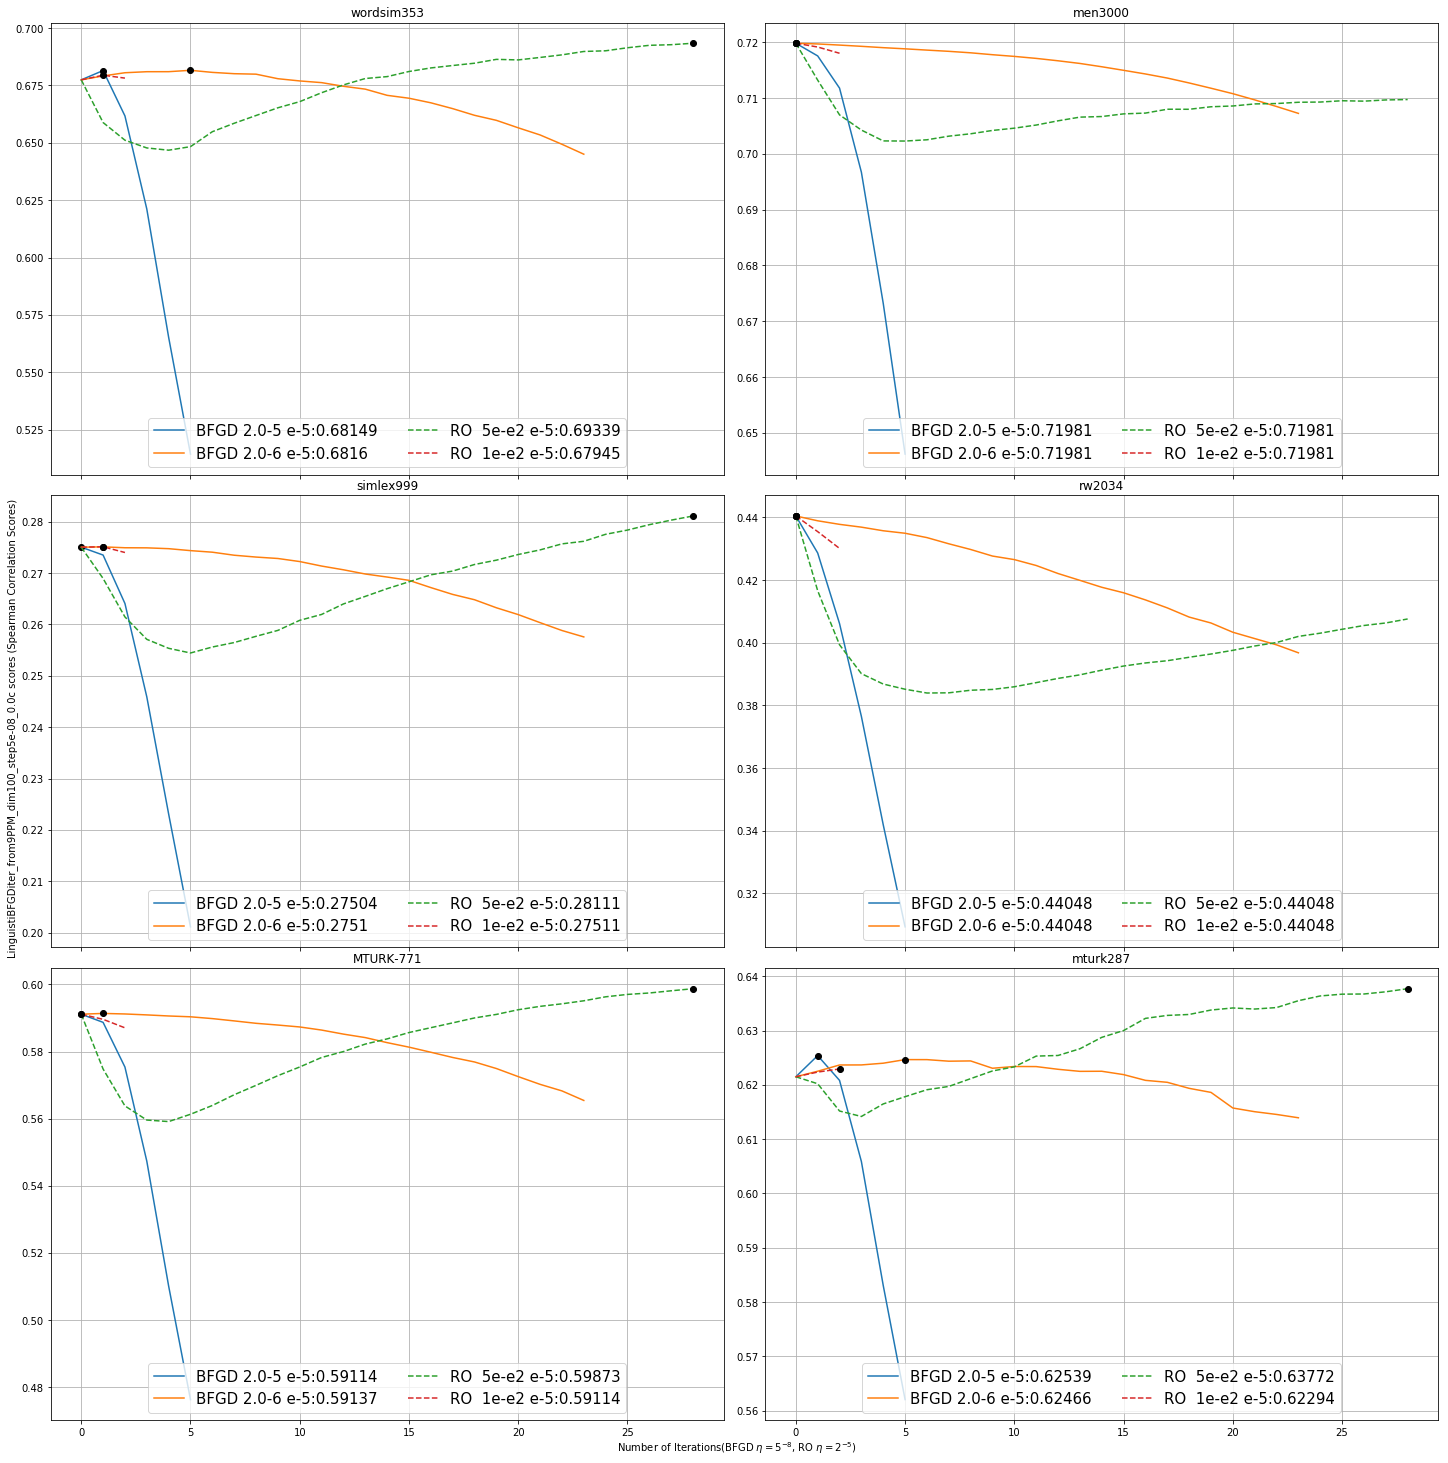

In [20]:
%%time
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from IPython import display

import numpy as np
import pandas as pd

from numpy.linalg import norm, svd

import itertools
import pickle
import math
import re, csv

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import logging

from util.word2vec_as_MF import Word2vecMF
from util.functions import *
from util.visualize import *

import time
dimension = 100
model =  Word2vecMF()

#datapath='enwik-200/BFGDiter_fromenwik8_dense_dim100_step1e-07_0.0'
#datapath='enwik-200/PSiter_fromenwik8_dim100_step1e-05_0.0'
#datapath='enwik-200/PSiter_fromenwik8PMM_dim100_step1e-05_0.0'
#datapath='enwik-200/PSiter_from9X0_dim100_step5e-05_0.0'
#datapath='enwik-200/BFGDiter_from8PMM_dim100_step2.59178322952e-08_0.0'
#datapath='enwik-200/BFGDiter_from8X0_dim100_step2.59178322952e-08_0.0'
#datapath= 'enwik-200/PSiter_from9PPM_dim100_step1e-05_0.0'
#datapath= 'enwik-200/PS10iter_fromSVD_dim100_step5e-05_factors/'
#datapath='enwik-200/BFGDiter_from9X0_dim100_step2.441114203507839e-09_0.0'
#datapath='initializations/SPPMI5/'
#datapath='enwik-200/BFGDiter_from9PPM_dim100_step2e-05_0.0'
#datapath='enwik-200/biasedRevBFGDiter_from8SPPMI5_dim100_step1e-07_0.0'
#datapath='enwik-200/PSiter_from9PPM_dim100_step2e-05_0.0'

label_list={
    #'BFGDiter_from9PPM_dim100_step5.9e-08_0.0': 'BFGD 5.9-8',
    #'BFGDiter_from9PPM_dim100_step5e-08_2.0': 'reg 2.0',
    #'BFGDiter_from9PPM_dim100_step5e-08_0.0':'reg 0.0',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step2e-08_0.0':'2e-08 new',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step2e-06_0.0':'2e-06 new',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step1e-07_0.0': '1e-07 new',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step2e-07_0.0': '2e-07 new',
    #'BFGDiter_fromenwik9-sub0.001000SPPMI5_dim100_step2e-07_0.0': '2e-07 e-3',
    #'BFGDiter_fromenwik9-sub0.001000SPPMI5_dim100_step1e-07_0.0': '1e-07 e-3',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step5e-07_0.0': '5e-07 new',
    
    #'BFGDiter_from9PPM_dim100_step7e-08_0.0': 'BFGD 7-08',
    #'BFGDiter_from9PPM_dim100_step5e-09_0.0': 'BFGD 5.0-9',
    #'BFGDiter_from9PPM_dim100_step1e-08_0.0': 'BFGD 1.0-8',
    #BFGDiter_from9PPM_dim100_step2e-08_0.0': 'BFGD 2.0-8',
    #'BFGDiter_from9PPM_dim100_step3.5e-08_0.0': 'BFGD 3.5-8',
    #'BFGDiter_from9PPM_dim100_step4e-08_0.0': 'BFGD 4.0-8',
    'BFGDiter_fromenwik9-sub0.000010SPPMI5_dim100_step2e-05_0.0': 'BFGD 2.0-5 e-5',
    'BFGDiter_fromenwik9-sub0.000010SPPMI5_dim100_step2e-06_0.0': 'BFGD 2.0-6 e-5',
   
    #####'PSiter_from9PPM_dim100_step2e-05_0.0': 'RO',
    
    #'PSiter_from9PPM_dim100_step3e-05_0.0' : 'RO3 bad',
    #'PSiter_from9PPM_dim100_step2e-05_0.0' : 'RO2 bad',    
    #'PSiter_from9PPM_dim100_step1.5e-05_0.0'new : 'RO1.5',
    #'PSiter_from9PPM_dim100_step3e-06_0.0' : 'RO3.0-6',
    #'PSiter_from9PPM_dim100_step5e-06_0.0' : 'RO5.0-6',
    #PSiter_from9PPM_dim100_step6e-06_0.0' : 'RO6.0-6',
    #'BFGDiter_from9PPM_dim100_step5e-08_0.0': 'BFGD 5e-08',
    #'PSiter_fromenwik9-sub0.000100SPPMI5_dim100_step3e-05_0.0': 'RO subsampling 3e-05',
    #'PSiter_fromenwik9-sub0.001000SPPMI5_dim100_step0.0001_0.0': 'RO 1e-04 e-3',
    #'PSiter_fromenwik9-sub0.001000SPPMI5_dim100_step8e-05_0.0': 'RO 8e-05 e-3'
    #'PSiter_fromenwik9-sub0.000010SPPMI5_dim100_step0.0001_0.0': 'RO  1e-04 e-5'
    'PSiter_fromenwik9-sub0.000010SPPMI5_dim100_step0.05_0.0': 'RO  5e-e2 e-5',
    'PSiter_fromenwik9-sub0.000010SPPMI5_dim100_step0.01_0.0': 'RO  1e-e2 e-5'
    #PSiter_from9PPM_dim100_step1e-05_0.0' : 'RO1.0-5',

    #'biasedRevBFGDiter_from9PPM_dim100_step5e-08_0.0': 'unbalanced SVD $C=U$, $W=SV$',
    #'revBFGDiter_from9PPM_dim100_step5e-08_0.0': 'BFGD 5e-08 + SVD'
}
'''sorted_names = ['wordsim_sim', 'wordsim_rel', 'wordsim353','men3000','simlex999',
                'rw2034', 'MTURK-771', 'mturk287', 'verb143','rg65', 'mc30']'''
sorted_names = ['wordsim353', 'men3000','simlex999',
                'rw2034', 'MTURK-771', 'mturk287']
#sorted_names = ['wordsim_sim']
column = 2
row = 3
fig, axarr = plt.subplots(row, column, sharex=True, figsize=(20, 20))
fig.tight_layout()
for datapath in label_list.keys():
    datapath = 'enwik-200/'+datapath
    for idx, name in enumerate(sorted_names):
        i=idx//column
        j=idx%column
        axarr[i,j].set_title(name)   

        axarr[i,j].grid(True)
        ben_dict, steps =bench_dict(from_folder=datapath, 
              MAX_ITER=40,plot_corrs=False)
        max_dict= {benchmark: 
               (round(max(ben_dict[benchmark]),5), steps[np.argmax(ben_dict[benchmark])]) 
                                                                          for benchmark in ben_dict.keys()}
          
#print(corr_dict1)
#corr_dict=corr_dict1
        if -1==datapath.find('BFGD'):
            axarr[i,j].plot(steps, ben_dict[name], linestyle= '--', 
                            label=label_list[datapath.split('/')[1]]+':'+str(max_dict[name][0]))
        else:
            axarr[i,j].plot(steps, ben_dict[name], 
                            label=label_list[datapath.split('/')[1]]+':'+str(max_dict[name][0]))
        
        #print(max_dict[name])
        axarr[i,j].plot(max_dict[name][1], max_dict[name][0], 'ko')
         

    #print(datapath.split('/'), max_dict)
    for idx, name in enumerate(sorted_names):
        i=idx//column
        j=idx%column
        axarr[i,j].legend(loc='lower center', fontsize=15, ncol=2)
fig.text(-0.003,0.5, "LinguistiBFGDiter_from9PPM_dim100_step5e-08_0.0c scores (Spearman Correlation Scores)", ha="center", va="center",  rotation=90)
fig.text(0.5,0.0, "Number of Iterations(BFGD $\eta=5^{-8}$, RO $\eta=2^{-5}$)", ha="center", va="center")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 1.93 s, sys: 57.6 ms, total: 1.99 s
Wall time: 2.12 s


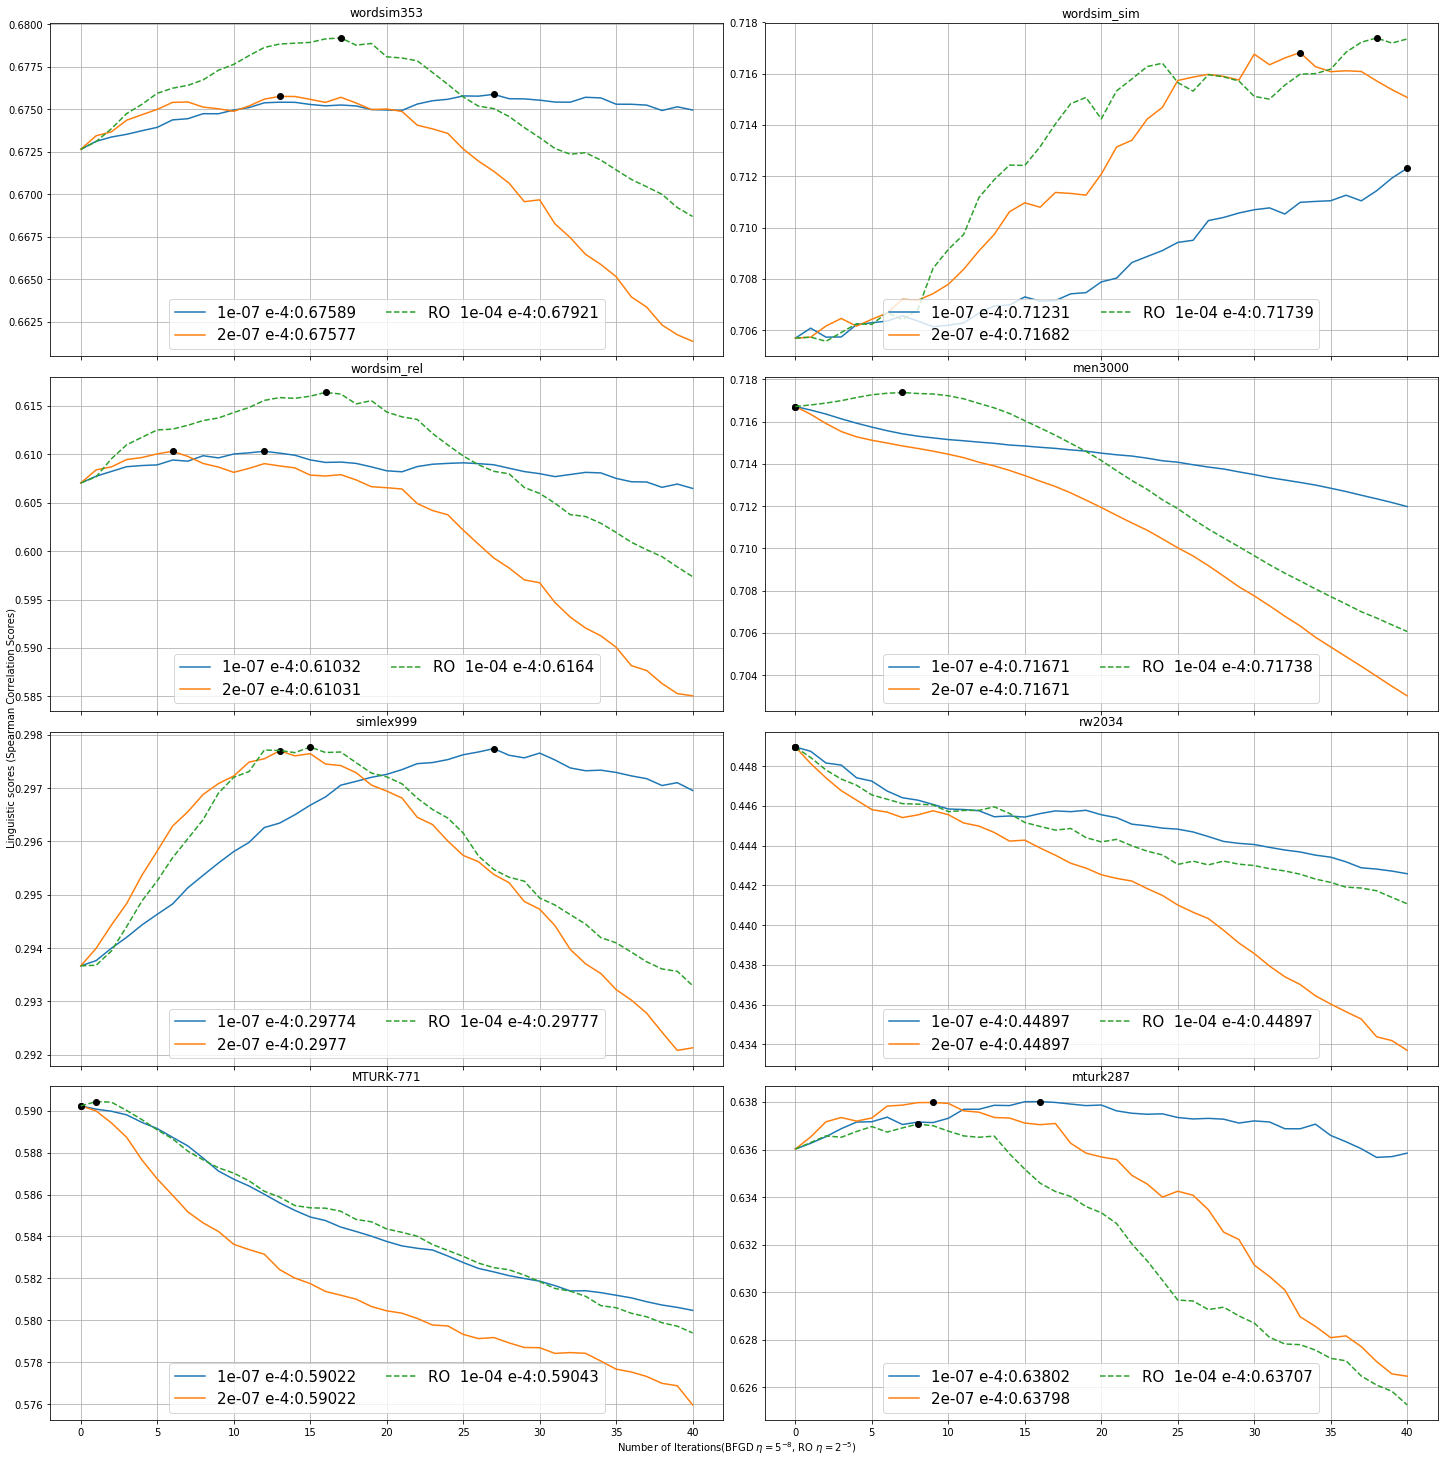

In [21]:
%%time
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from IPython import display

import numpy as np
import pandas as pd

from numpy.linalg import norm, svd

import itertools
import pickle
import math
import re, csv

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import logging

from util.word2vec_as_MF import Word2vecMF
from util.functions import *
from util.visualize import *

import time
dimension = 100
model =  Word2vecMF()

#datapath='enwik-200/BFGDiter_fromenwik8_dense_dim100_step1e-07_0.0'
#datapath='enwik-200/PSiter_fromenwik8_dim100_step1e-05_0.0'
#datapath='enwik-200/PSiter_fromenwik8PMM_dim100_step1e-05_0.0'
#datapath='enwik-200/PSiter_from9X0_dim100_step5e-05_0.0'
#datapath='enwik-200/BFGDiter_from8PMM_dim100_step2.59178322952e-08_0.0'
#datapath='enwik-200/BFGDiter_from8X0_dim100_step2.59178322952e-08_0.0'
#datapath= 'enwik-200/PSiter_from9PPM_dim100_step1e-05_0.0'
#datapath= 'enwik-200/PS10iter_fromSVD_dim100_step5e-05_factors/'
#datapath='enwik-200/BFGDiter_from9X0_dim100_step2.441114203507839e-09_0.0'
#datapath='initializations/SPPMI5/'
#datapath='enwik-200/BFGDiter_from9PPM_dim100_step2e-05_0.0'
#datapath='enwik-200/biasedRevBFGDiter_from8SPPMI5_dim100_step1e-07_0.0'
#datapath='enwik-200/PSiter_from9PPM_dim100_step2e-05_0.0'

label_list={
    #'BFGDiter_from9PPM_dim100_step5.9e-08_0.0': 'BFGD 5.9-8',
    #'BFGDiter_from9PPM_dim100_step5e-08_2.0': 'reg 2.0',
    #'BFGDiter_from9PPM_dim100_step5e-08_0.0':'reg 0.0',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step2e-08_0.0':'2e-08 new',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step2e-06_0.0':'2e-06 new',
    'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step1e-07_0.0': '1e-07 e-4',
    'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step2e-07_0.0': '2e-07 e-4',
    #'BFGDiter_fromenwik9-sub0.001000SPPMI5_dim100_step2e-07_0.0': '2e-07 e-3',
    #'BFGDiter_fromenwik9-sub0.001000SPPMI5_dim100_step1e-07_0.0': '1e-07 e-3',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step5e-07_0.0': '5e-07 new',
    
    #'BFGDiter_from9PPM_dim100_step7e-08_0.0': 'BFGD 7-08',
    #'BFGDiter_from9PPM_dim100_step5e-09_0.0': 'BFGD 5.0-9',
    #'BFGDiter_from9PPM_dim100_step1e-08_0.0': 'BFGD 1.0-8',
    #BFGDiter_from9PPM_dim100_step2e-08_0.0': 'BFGD 2.0-8',
    #'BFGDiter_from9PPM_dim100_step3.5e-08_0.0': 'BFGD 3.5-8',
    #'BFGDiter_from9PPM_dim100_step4e-08_0.0': 'BFGD 4.0-8',
    #'BFGDiter_from9PPM_dim100_step5e-08_0.0': 'BFGD 5.0-8',
   
    #####'PSiter_from9PPM_dim100_step2e-05_0.0': 'RO',
    
    #'PSiter_from9PPM_dim100_step3e-05_0.0' : 'RO3 bad',
    #'PSiter_from9PPM_dim100_step2e-05_0.0' : 'RO2 bad',    
    #'PSiter_from9PPM_dim100_step1.5e-05_0.0' : 'RO1.5',
    #'PSiter_from9PPM_dim100_step3e-06_0.0' : 'RO3.0-6',
    #'PSiter_from9PPM_dim100_step5e-06_0.0' : 'RO5.0-6',
    #PSiter_from9PPM_dim100_step6e-06_0.0' : 'RO6.0-6',
    #'BFGDiter_from9PPM_dim100_step5e-08_0.0': 'BFGD 5e-08',
    #'PSiter_fromenwik9-sub0.000100SPPMI5_dim100_step3e-05_0.0': 'RO subsampling 3e-05',
    'PSiter_fromenwik9-sub0.000100SPPMI5_dim100_step0.0001_0.0': 'RO  1e-04 e-4'
    #PSiter_from9PPM_dim100_step1e-05_0.0' : 'RO1.0-5',

    #'biasedRevBFGDiter_from9PPM_dim100_step5e-08_0.0': 'unbalanced SVD $C=U$, $W=SV$',
    #'revBFGDiter_from9PPM_dim100_step5e-08_0.0': 'BFGD 5e-08 + SVD'
}
'''sorted_names = ['wordsim_sim', 'wordsim_rel', 'wordsim353','men3000','simlex999',
                'rw2034', 'MTURK-771', 'mturk287', 'verb143','rg65', 'mc30']'''
sorted_names = ['wordsim353', 'wordsim_sim', 'wordsim_rel', 'men3000','simlex999',
                'rw2034', 'MTURK-771', 'mturk287']
#sorted_names = ['wordsim_sim']
column = 2
row = 4
fig, axarr = plt.subplots(row, column, sharex=True, figsize=(20, 20))
fig.tight_layout()
for datapath in label_list.keys():
    datapath = 'enwik-200/'+datapath
    for idx, name in enumerate(sorted_names):
        i=idx//column
        j=idx%column
        axarr[i,j].set_title(name)   

        axarr[i,j].grid(True)
        ben_dict, steps =bench_dict(from_folder=datapath, 
              MAX_ITER=100,plot_corrs=False)
        max_dict= {benchmark: 
               (round(max(ben_dict[benchmark]),5), steps[np.argmax(ben_dict[benchmark])]) 
                                                                          for benchmark in ben_dict.keys()}
          
#print(corr_dict1)
#corr_dict=corr_dict1
        if -1==datapath.find('BFGD'):
            axarr[i,j].plot(steps, ben_dict[name], linestyle= '--', 
                            label=label_list[datapath.split('/')[1]]+':'+str(max_dict[name][0]))
        else:
            axarr[i,j].plot(steps, ben_dict[name], 
                            label=label_list[datapath.split('/')[1]]+':'+str(max_dict[name][0]))
        
        #print(max_dict[name])
        axarr[i,j].plot(max_dict[name][1], max_dict[name][0], 'ko')
         

    #print(datapath.split('/'), max_dict)
    for idx, name in enumerate(sorted_names):
        i=idx//column
        j=idx%column
        axarr[i,j].legend(loc='lower center', fontsize=15, ncol=2)
fig.text(-0.003,0.5, "Linguistic scores (Spearman Correlation Scores)", ha="center", va="center",  rotation=90)
fig.text(0.5,0.0, "Number of Iterations(BFGD $\eta=5^{-8}$, RO $\eta=2^{-5}$)", ha="center", va="center")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 1.96 s, sys: 52 ms, total: 2.01 s
Wall time: 2.16 s


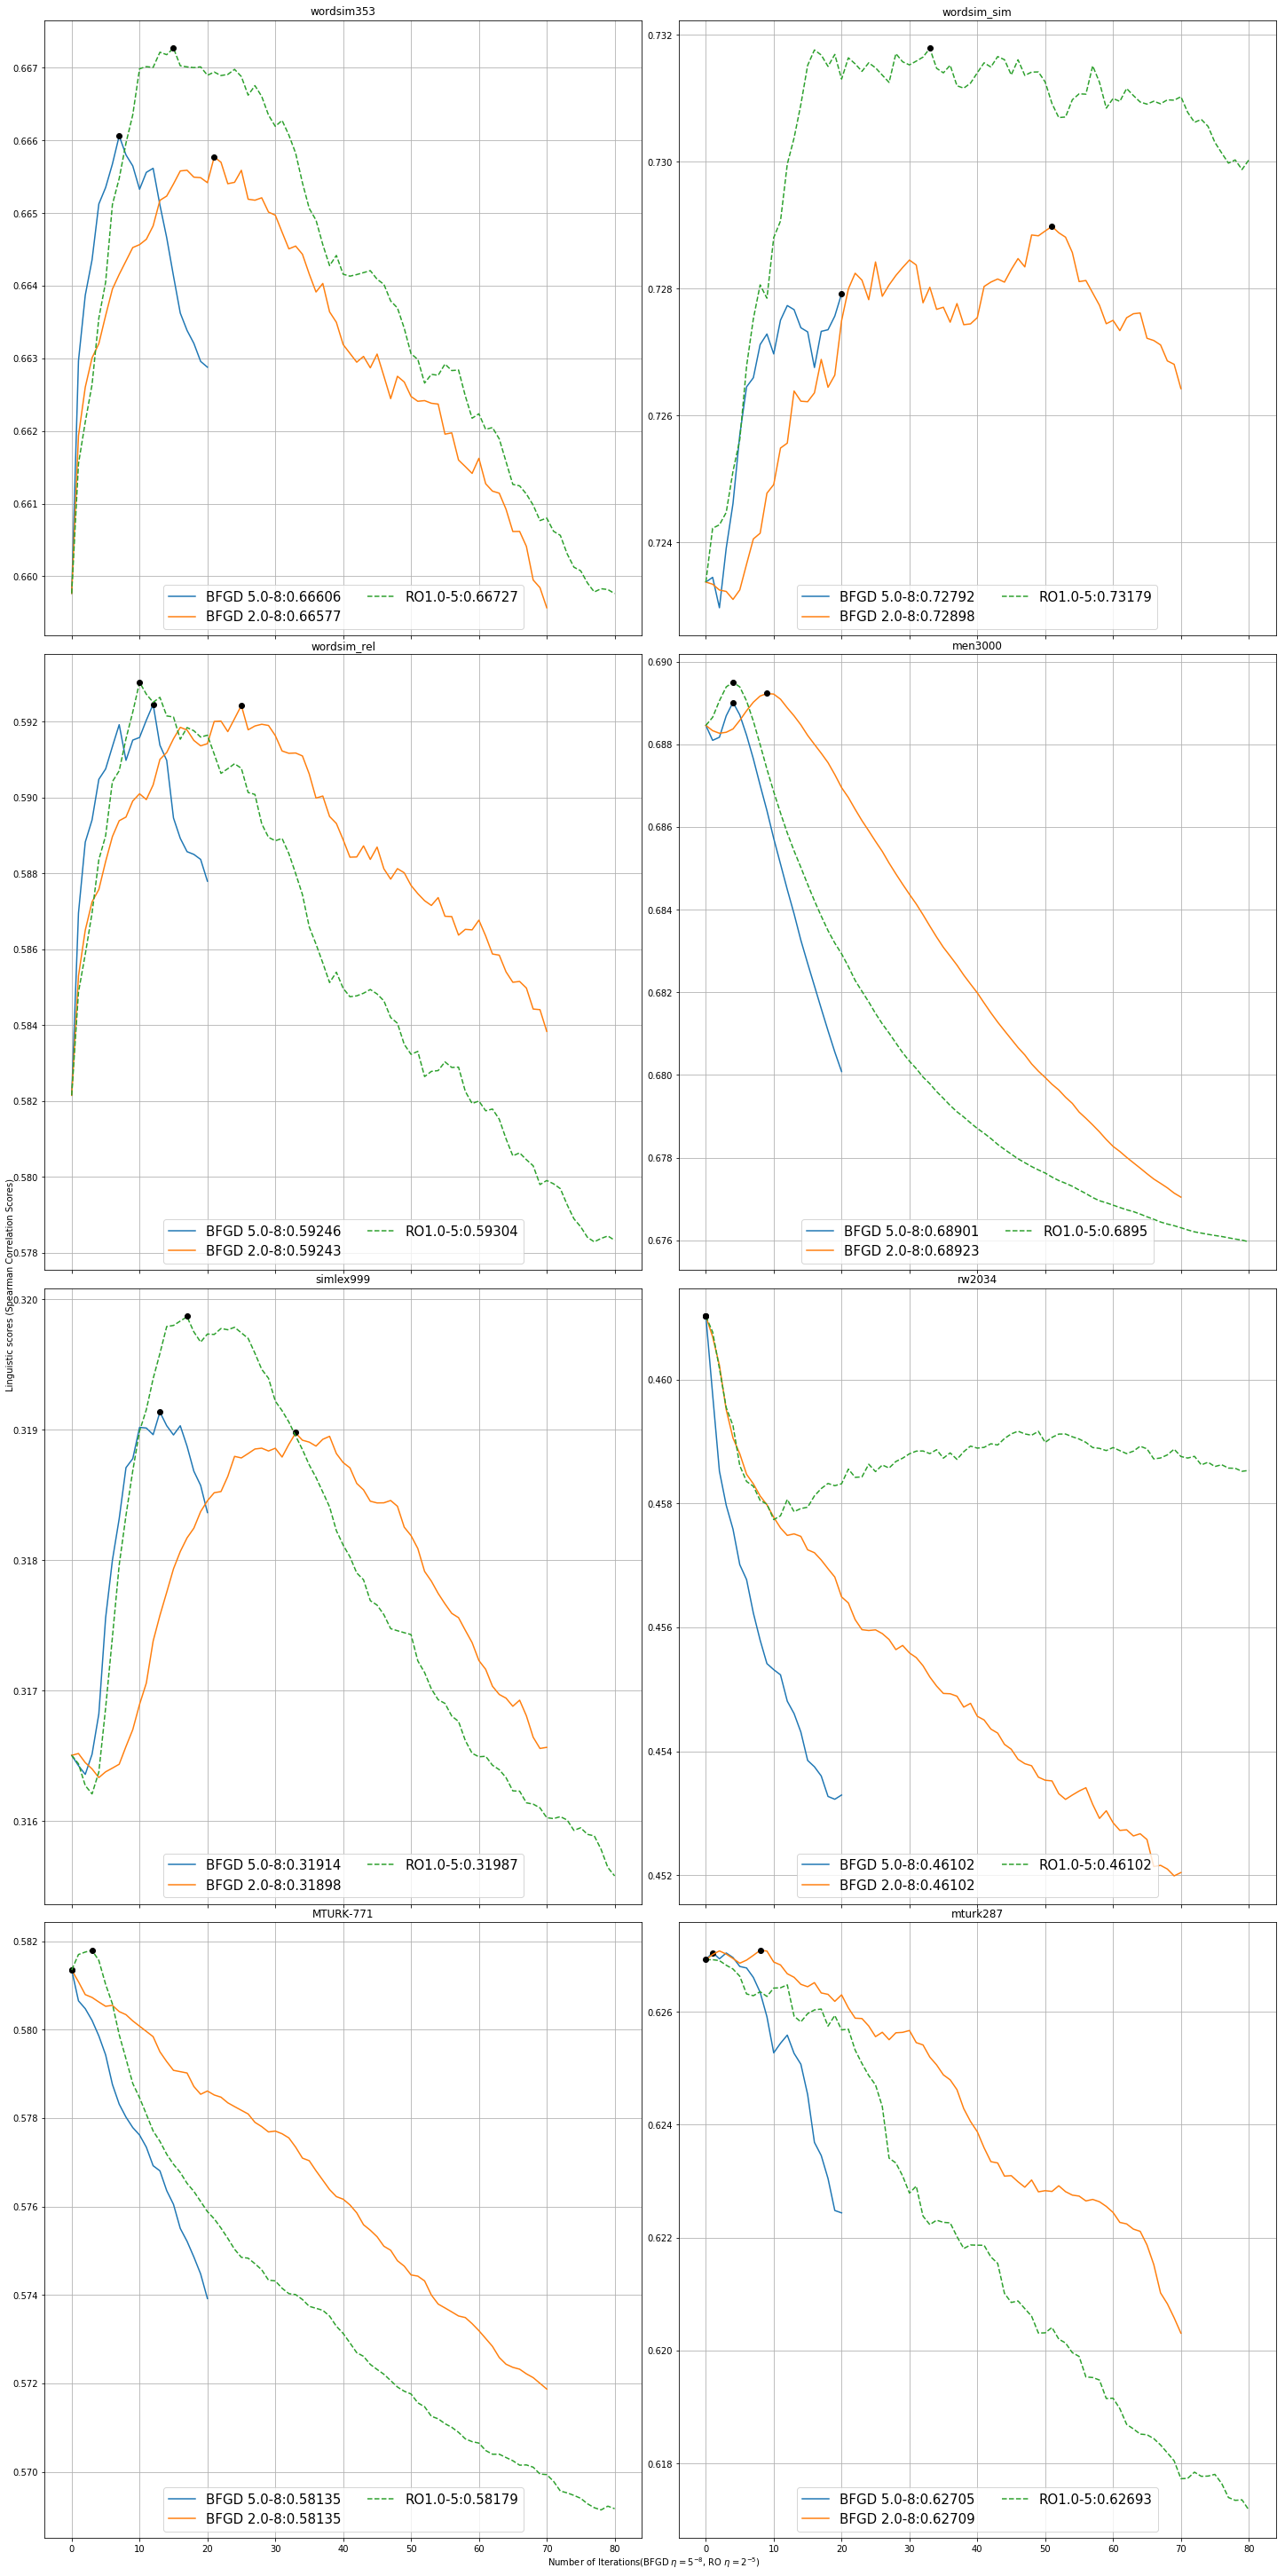

In [22]:
%%time
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from IPython import display

import numpy as np
import pandas as pd

from numpy.linalg import norm, svd

import itertools
import pickle
import math
import re, csv

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import logging

from util.word2vec_as_MF import Word2vecMF
from util.functions import *
from util.visualize import *

import time
dimension = 100
model =  Word2vecMF()

#datapath='enwik-200/BFGDiter_fromenwik8_dense_dim100_step1e-07_0.0'
#datapath='enwik-200/PSiter_fromenwik8_dim100_step1e-05_0.0'
#datapath='enwik-200/PSiter_fromenwik8PMM_dim100_step1e-05_0.0'
#datapath='enwik-200/PSiter_from9X0_dim100_step5e-05_0.0'
#datapath='enwik-200/BFGDiter_from8PMM_dim100_step2.59178322952e-08_0.0'
#datapath='enwik-200/BFGDiter_from8X0_dim100_step2.59178322952e-08_0.0'
#datapath= 'enwik-200/PSiter_from9PPM_dim100_step1e-05_0.0'
#datapath= 'enwik-200/PS10iter_fromSVD_dim100_step5e-05_factors/'
#datapath='enwik-200/BFGDiter_from9X0_dim100_step2.441114203507839e-09_0.0'
#datapath='initializations/SPPMI5/'
#datapath='enwik-200/BFGDiter_from9PPM_dim100_step2e-05_0.0'
#datapath='enwik-200/biasedRevBFGDiter_from8SPPMI5_dim100_step1e-07_0.0'
#datapath='enwik-200/PSiter_from9PPM_dim100_step2e-05_0.0'

label_list={
    #'BFGDiter_from9PPM_dim100_step5.9e-08_0.0': 'BFGD 5.9-8',
    'BFGDiter_from9PPM_dim100_step5e-08_0.0':'BFGD 5.0-8',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step2e-08_0.0':'2e-08 new',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step2e-06_0.0':'2e-06 new',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step1e-07_0.0': '1e-07 new',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step2e-07_0.0': '2e-07 new',
    #'BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step5e-07_0.0': '5e-07 new',
    
    #'BFGDiter_from9PPM_dim100_step7e-08_0.0': 'BFGD 7-08',
    #'BFGDiter_from9PPM_dim100_step5e-09_0.0': 'BFGD 5.0-9',
    #'BFGDiter_from9PPM_dim100_step1e-08_0.0': 'BFGD 1.0-8',
    'BFGDiter_from9PPM_dim100_step2e-08_0.0': 'BFGD 2.0-8',
    #'BFGDiter_from9PPM_dim100_step3.5e-08_0.0': 'BFGD 3.5-8',
    #'BFGDiter_from9PPM_dim100_step4e-08_0.0': 'BFGD 4.0-8',
    #'BFGDiter_from9PPM_dim100_step5e-08_0.0': 'BFGD 5.0-8',
   
    #####'PSiter_from9PPM_dim100_step2e-05_0.0': 'RO',
    
    #'PSiter_from9PPM_dim100_step3e-05_0.0' : 'RO3 bad',
    #'PSiter_from9PPM_dim100_step2e-05_0.0' : 'RO2 bad',    
    #'PSiter_from9PPM_dim100_step1.5e-05_0.0' : 'RO1.5',
    #'PSiter_from9PPM_dim100_step3e-06_0.0' : 'RO3.0-6',
    #'PSiter_from9PPM_dim100_step5e-06_0.0' : 'RO5.0-6',subsampling
    #PSiter_from9PPM_dim100_step6e-06_0.0' : 'RO6.0-6',
    #'PSiter_fromenwik9-sub0.000100SPPMI5_dim100_step3e-05_0.0': 'RO subsampling 3e-05',
    #'PSiter_fromenwik9-sub0.001000SPPMI5_dim100_step0.0001_0.0': 'RO subsampling3 1e-04'
    #'PSiter_fromenwik9-sub0.000100SPPMI5_dim100_step0.0001_0.0': 'RO subsampling 1e-04'
    'PSiter_from9PPM_dim100_step1e-05_0.0' : 'RO1.0-5',

    #'biasedRevBFGDiter_from9PPM_dim100_step5e-08_0.0': 'unbalanced SVD $C=U$, $W=SV$',
    #'revBFGDiter_from9PPM_dim100_step5e-08_0.0': 'BFGD 5e-08 + SVD'
}
'''sorted_names = ['wordsim_sim', 'wordsim_rel', 'wordsim353','men3000','simlex999',
                'rw2034', 'MTURK-771', 'mturk287', 'verb143','rg65', 'mc30']'''
sorted_names = ['wordsim353', 'wordsim_sim', 'wordsim_rel', 'men3000','simlex999',
                'rw2034', 'MTURK-771', 'mturk287']
#sorted_names = ['wordsim_sim']
column = 2
row = 4
fig, axarr = plt.subplots(row, column, sharex=True, figsize=(20, 40))
fig.tight_layout()
for datapath in label_list.keys():
    datapath = 'enwik-200/'+datapath
    for idx, name in enumerate(sorted_names):
        i=idx//column
        j=idx%column
        axarr[i,j].set_title(name)   

        axarr[i,j].grid(True)
        ben_dict, steps =bench_dict(from_folder=datapath, 
              MAX_ITER=100,plot_corrs=False)
        max_dict= {benchmark: 
               (round(max(ben_dict[benchmark]),5), steps[np.argmax(ben_dict[benchmark])]) 
                                                                          for benchmark in ben_dict.keys()}
          
#print(corr_dict1)
#corr_dict=corr_dict1
        if -1==datapath.find('BFGD'):
            axarr[i,j].plot(steps, ben_dict[name], linestyle= '--', 
                            label=label_list[datapath.split('/')[1]]+':'+str(max_dict[name][0]))
        else:
            axarr[i,j].plot(steps, ben_dict[name], 
                            label=label_list[datapath.split('/')[1]]+':'+str(max_dict[name][0]))
        
        #print(max_dict[name])
        axarr[i,j].plot(max_dict[name][1], max_dict[name][0], 'ko')    
         

    #print(datapath.split('/'), max_dict)
    for idx, name in enumerate(sorted_names):
        i=idx//column
        j=idx%column
        axarr[i,j].legend(loc='lower center', fontsize=15, ncol=2)
fig.text(-0.003,0.5, "Linguistic scores (Spearman Correlation Scores)", ha="center", va="center",  rotation=90)
fig.text(0.5,0.0, "Number of Iterations(BFGD $\eta=5^{-8}$, RO $\eta=2^{-5}$)", ha="center", va="center")

In [ ]:
sentences=load(from_file='data/enwik8.txt')
skip = Word2Vec(sentences, size=dimension, min_count=5)

In [ ]:
Path = 'datasets/mturk287.csv'
print(Path)

df = pd.read_csv(Path,header=None, delimiter=';');
score1, _, _, chosen_pairs = correlation(model = model, benchmark = df, 
                                            from_folder='enwik-200/AMiter_fromPMM_D2_dim20_step1e-05_0.006',
                                           index=190000);
print(score1, len(chosen_pairs))

score2, _, _, chosen_pairs = correlation(model = model, benchmark = df,
                                            from_folder='enwik-200/PSiter_fromSVD_dim20_step5e-05_0.0',
                                           index=360000);
print(score2, len(chosen_pairs))

score3, _, _, chosen_pairs = corr_word2vec(skip ,df, model_vocab=model.vocab)
print(score3, len(chosen_pairs))

dictionary['Evaluation'].append(Path.split('/')[1].split('.')[0])
dictionary['BFGD'].append(score1)
dictionary['RO'].append(score2)
dictionary['word2vec'].append(score3)
dictionary['number of pairs'].append(len(chosen_pairs))

In [ ]:
Path = 'datasets/rw2034.csv'
print(Path)

df = pd.read_csv(Path,header=None, delimiter=';');
'''score1, _, _, chosen_pairs = correlation(model = model, benchmark = df, 
                                            from_folder='enwik-200/AMiter_fromPMM_D2_dim20_step1e-05_0.006',
                                           index=190000);
print(score1, len(chosen_pairs))

score2, _, _, chosen_pairs = correlation(model = model, benchmark = df,
                                            from_folder='enwik-200/PSiter_fromSVD_dim20_step5e-05_0.0',
                                           index=360000);
print(score2, len(chosen_pairs))'''

score3, _, _, chosen_pairs = corr_word2vec(skip ,df, model_vocab=model.vocab)
print(score3, len(chosen_pairs))

dictionary['Evaluation'].append(Path.split('/')[1].split('.')[0])
'''dictionary['BFGD'].append(score1)
dictionary['RO'].append(score2)'''
dictionary['word2vec'].append(score3)
dictionary['number of pairs'].append(len(chosen_pairs))

In [ ]:
Path = 'datasets/simlex999.csv'
print(Path)

df = pd.read_csv(Path,header=None, delimiter=';');
score1, _, _, chosen_pairs = correlation(model = model, benchmark = df, 
                                            from_folder='enwik-200/AMiter_fromPMM_D2_dim20_step1e-05_0.006',
                                           index=190000);
print(score1, len(chosen_pairs))

score2, _, _, chosen_pairs = correlation(model = model, benchmark = df,
                                            from_folder='enwik-200/PSiter_fromSVD_dim20_step5e-05_0.0',
                                           index=360000);
print(score2, len(chosen_pairs))

score3, _, _, chosen_pairs = corr_word2vec(skip ,df, model_vocab=model.vocab)
print(score3, len(chosen_pairs))

dictionary['Evaluation'].append(Path.split('/')[1].split('.')[0])
dictionary['BFGD'].append(score1)
dictionary['RO'].append(score2)
dictionary['word2vec'].append(score3)
dictionary['number of pairs'].append(len(chosen_pairs))

In [ ]:
df = pd.DataFrame(dictionary)
cols = df.columns.tolist()
j = cols.index('Evaluation')
cols[0],cols[j]=cols[j], cols[0]
j = cols.index('number of pairs')
cols[-1],cols[j]=cols[j], cols[-1]
df=df[cols]
df.style

enwik8

In [ ]:
bfgd = Word2vecMF(); bfgd.load_CW('enwik-200/BFGDiter_from9PPM_dim100_step2e-08_0.0', 13)
ro   = Word2vecMF(); ro.load_CW('enwik-200/PSiter_from9PPM_dim100_step6e-06_0.0', 13)
print(bfgd.MF(bfgd.C, bfgd.W))

In [ ]:
Path = 'datasets/verb143.csv'
print(Path)

df = pd.read_csv(Path,header=None, delimiter=';');
score1, _, _, chosen_pairs = correlation(model = model, benchmark = df, 
                                            from_folder='enwik-200/AMiter_fromPMM_D2_dim20_step1e-05_0.006',
                                           index=190000);
print(score1, len(chosen_pairs))

score2, _, _, chosen_pairs = correlation(model = model, benchmark = df,
                                            from_folder='enwik-200/PSiter_fromSVD_dim20_step5e-05_0.0',
                                           index=360000);
print(score2, len(chosen_pairs))

In [ ]:
%%time
%matplotlib inline
#datapath='enwik-200/BFGDiter_fromenwik8_dense_dim100_step1e-07_0.0'
#datapath='enwik-200/PSiter_fromenwik8_dim100_step1e-05_0.0'
#datapath='enwik-200/PSiter_fromenwik8PMM_dim100_step1e-05_0.0'
#datapath='enwik-200/PSiter_from9X0_dim100_step5e-05_0.0'
#datapath='enwik-200/BFGDiter_from8PMM_dim100_step2.59178322952e-08_0.0'
#datapath='enwik-200/BFGDiter_from8X0_dim100_step2.59178322952e-08_0.0'
#datapath= 'enwik-200/PSiter_from9PPM_dim100_step1e-05_0.0'
#datapath= 'enwik-200/PS10iter_fromSVD_dim100_step5e-05_factors/'
#datapath='enwik-200/BFGDiter_from9X0_dim100_step2.441114203507839e-09_0.0'
#datapath='initializations/SPPMI5/'
#datapath='enwik-200/PSiter_from9PMM_dim100_step5e-05_0.0'
datapath='enwik-200/PSiter_from8SPPMI5_dim100_step5e-05_0.0'
corr_dict=datasets_corr(from_folder=datapath, 
              MAX_ITER=500,plot_corrs=True)
max_dict= {benchmark: 
           (round(max(corr_dict[benchmark][1]),5), corr_dict[benchmark][0][np.argmax(corr_dict[benchmark][1])]) 
                                                                           for benchmark in corr_dict}
print(max_dict)

In [ ]:
%%time
%matplotlib inline
#datapath='enwik-200/BFGDiter_fromenwik8_dense_dim100_step1e-07_0.0'
#datapath='enwik-200/PSiter_fromenwik8_dim100_step1e-05_0.0'
#datapath='enwik-200/PSiter_fromenwik8PMM_dim100_step1e-05_0.0'
#datapath='enwik-200/PSiter_from9X0_dim100_step5e-05_0.0'
#datapath='enwik-200/BFGDiter_from8PMM_dim100_step2.59178322952e-08_0.0'
#datapath='enwik-200/BFGDiter_from8X0_dim100_step2.59178322952e-08_0.0'
#datapath= 'enwik-200/PSiter_from9PPM_dim100_step1e-05_0.0'
#datapath= 'enwik-200/PS10iter_fromSVD_dim100_step5e-05_factors/'
#datapath='enwik-200/BFGDiter_from9X0_dim100_step2.441114203507839e-09_0.0'
#datapath='initializations/SPPMI5/'
#datapath='enwik-200/PSiter_from9PMM_dim100_step5e-05_0.0'
datapath='enwik-200/BFGDiter_fromenwik9-sub0.000100SPPMI5_dim100_step2e-08_0.0'
#datapath='enwik-200/PSiter_from8SPPMI5_dim100_step5e-05_0.0'
corr_dict=bench_dict(from_folder=datapath, 
              MAX_ITER=500,plot_corrs=True)
max_dict= {benchmark: 
           (round(max(corr_dict[benchmark][1]),5), corr_dict[benchmark][0][np.argmax(corr_dict[benchmark][1])]) 
                                                                           for benchmark in corr_dict}
print(max_dict)

In [ ]:
back={'wordsim_sim': 0.5083153291574576, 'wordsim_rel': 0.23051270181633066, 'wordsim353': 0.38721725196622725, 'men3000': 0.317088733602483, 'simlex999': 0.12770957277481088, 'rw2034': 0.3061656575652792, 'MTURK-771': 0.16602987279673054, 'rg65': 0.3058823529411765, 'verb143': 0.2739890953353197, 'mturk287': 0.351643421163816, 'mc30': 0.5}


In [ ]:
print({b: round(back[b],5)for b in back})